In [1]:
pip install --upgrade gensim

     |████████████████████████████████| 24.0 MB 15.3 MB/s eta 0:00:01
  Attempting uninstall: gensim
    Found existing installation: gensim 4.0.1
    Uninstalling gensim-4.0.1:
      Successfully uninstalled gensim-4.0.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install python-Levenshtein

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from matplotlib.pyplot import figure
from nltk.tokenize import word_tokenize
import pandas as pd
import string

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df = pd.read_csv('Movie_Sentiment_train.tsv', sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


**Cleanup data**
Remove rows with fewer than 3 words
Remove Punctuation and digits

In [6]:
df['wordcount'] = df['Phrase'].str.count(' ') + 1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
 4   wordcount   156060 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 6.0+ MB


In [8]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,wordcount
0,1,1,A series of escapades demonstrating the adage ...,1,37
1,2,1,A series of escapades demonstrating the adage ...,2,14
2,3,1,A series,2,2
3,4,1,A,2,1
4,5,1,series,2,1


In [9]:
df1 = df[df.wordcount > 4]

In [10]:
df1.head()

,PhraseId,SentenceId,Phrase,Sentiment,wordcount
0,1,1,A series of escapades demonstrating the adage ...,1,37
1,2,1,A series of escapades demonstrating the adage ...,2,14
5,6,1,of escapades demonstrating the adage that what...,2,12
7,8,1,escapades demonstrating the adage that what is...,2,11
9,10,1,demonstrating the adage that what is good for ...,2,10


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78290 entries, 0 to 156054
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    78290 non-null  int64 
 1   SentenceId  78290 non-null  int64 
 2   Phrase      78290 non-null  object
 3   Sentiment   78290 non-null  int64 
 4   wordcount   78290 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.6+ MB


In [12]:
# Define the function to remove the punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [13]:
df1['Phrase'] = df1['Phrase'].apply(remove_punctuations)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [14]:
df1['Phrase'] = df1['Phrase'].str.rstrip(string.digits)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78290 entries, 0 to 156054
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    78290 non-null  int64 
 1   SentenceId  78290 non-null  int64 
 2   Phrase      78290 non-null  object
 3   Sentiment   78290 non-null  int64 
 4   wordcount   78290 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.6+ MB


In [16]:
min(df1.wordcount)

5

<AxesSubplot:xlabel='Sentiment'>

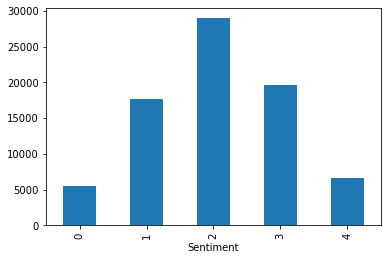

In [17]:
df1.groupby("Sentiment").Sentiment.count().plot.bar(ylim=0)

**Create Word2Vec**

In [18]:
sentences = []
for text in df['Phrase']:
    tok_phrase = word_tokenize(text)
    sentences.append(tok_phrase)

In [19]:
sentences

[['A',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose',
  'is',
  'also',
  'good',
  'for',
  'the',
  'gander',
  ',',
  'some',
  'of',
  'which',
  'occasionally',
  'amuses',
  'but',
  'none',
  'of',
  'which',
  'amounts',
  'to',
  'much',
  'of',
  'a',
  'story',
  '.'],
 ['A',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['A', 'series'],
 ['A'],
 ['series'],
 ['of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['of'],
 ['escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['escapades'],
 ['demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['demonstrating', 'the', 'adage'],
 ['demonstrating'

In [20]:
model = Word2Vec(sentences, min_count=10, sg=0, vector_size=100)
#sg = 1 means Slipgram (0 means CBOW)

In [21]:
print(model)

Word2Vec(vocab=12006, vector_size=100, alpha=0.025)


In [22]:
words = list(model.wv.key_to_index)
print(words)

['the', ',', 'a', 'of', 'and', 'to', '.', "'s", 'in', 'is', 'that', 'it', 'as', 'with', 'for', 'its', 'film', 'an', 'movie', 'this', 'but', 'be', 'on', 'The', 'you', "n't", 'by', 'more', 'his', '``', 'about', 'at', 'or', 'than', 'from', 'not', '--', 'one', 'have', 'are', 'all', "'", 'like', 'has', 'A', 'so', 'story', '-RRB-', 'who', 'out', 'most', 'into', '-LRB-', 'up', 'too', 'good', '`', 'their', '...', 'characters', 'much', 'I', 'can', 'your', 'comedy', 'no', 'if', 'just', 'does', 'what', 'some', 'time', 'will', 'funny', 'way', 'little', 'even', 'any', 'life', 'very', 'been', 'make', 'only', 'which', 'movies', 'It', 'he', 'enough', 'work', 'us', 'was', 'her', 'own', 'do', 'other', 'they', 'bad', 'something', 'would', 'through', 'many', 'love', 'never', 'people', 'made', 'best', 'we', 'makes', 'action', 'director', 'them', 'when', 'two', 'plot', 'films', 'may', 'how', 'character', 'could', 'see', 'well', 'new', 'audience', 'drama', 'there', 'better', 'look', 'being', 'really', 'sense

In [23]:
# access vector for one word
print(model.wv['amuses'])

[-0.04059168  0.09365273 -0.08564757 -0.01304834  0.01384608 -0.03994474
  0.05980983  0.03123492 -0.1124036  -0.10025945 -0.01188971 -0.12194373
  0.03352663 -0.0043383  -0.02837226  0.08046933  0.04766003  0.13028622
 -0.13637172  0.01290414  0.17311835  0.11407165 -0.00175383 -0.12262815
  0.02565875  0.01047802 -0.06515634 -0.03897233  0.06614607 -0.00307059
 -0.01026279 -0.07921656 -0.06638888 -0.11768167  0.00604169  0.19559512
  0.16881534  0.2214923   0.07067586 -0.00973633  0.1142166   0.02024539
  0.03926836 -0.17233522  0.05292717  0.1049156   0.06796154  0.09924336
  0.06300087  0.08251823  0.1027929  -0.18410747 -0.00137283  0.0220048
  0.00697391 -0.02276659  0.11115476  0.0134322  -0.05807227 -0.09196945
 -0.06338923  0.23776522  0.22567946  0.02797189 -0.0650654   0.02666788
  0.08747303  0.02525084 -0.07564684  0.08920191  0.04353298 -0.05713303
  0.11686072  0.00320948  0.10713454 -0.05132703 -0.11966943 -0.03506994
  0.08834111 -0.03294411 -0.04419024  0.08836024  0.

In [24]:
#testing some samples
model.wv.most_similar('amuses')

[('dealt', 0.6461050510406494),
 ('jettisoned', 0.5952643752098083),
 ('also', 0.5847000479698181),
 ('utilized', 0.5751095414161682),
 ('singer-turned', 0.5683677792549133),
 ('lags', 0.5626059174537659),
 ('happening', 0.5624377727508545),
 ('Catcher', 0.5593791007995605),
 ('arguing', 0.5556302070617676),
 ('weirdly', 0.5521788597106934)]

In [25]:
#testing some samples
model.wv.most_similar('bad')

[('good', 0.6311787366867065),
 ('terrible', 0.5837386846542358),
 ('guy', 0.5454151034355164),
 ('mediocre', 0.5417582392692566),
 ('long', 0.5269209742546082),
 ('really', 0.5243745446205139),
 ('same', 0.516067624092102),
 ('need', 0.5107848048210144),
 ('declared', 0.5056546330451965),
 ('seeing', 0.5026438236236572)]

In [26]:
#testing some samples
model.wv.most_similar('funny')

[('amusing', 0.796851634979248),
 ('sometimes', 0.7374581694602966),
 ('charming', 0.7074648141860962),
 ('smart', 0.7062004804611206),
 ('sad', 0.6708080172538757),
 ('neither', 0.6520457863807678),
 ('sweet', 0.6377266645431519),
 ('clever', 0.6359434127807617),
 ('simply', 0.6310051083564758),
 ('diverting', 0.624282956123352)]

In [28]:
model.save('w2v_model.bin')
# load model
new_model = Word2Vec.load('w2v_model.bin')
print(model.wv.vectors)

[[ 2.25979656e-01 -4.71889257e-01  1.03191316e+00 ...  1.33266127e+00
   5.76385558e-01  4.71830040e-01]
 [ 5.03383517e-01  3.15578282e-01 -1.09840304e-01 ... -5.13323490e-03
  -1.22169209e+00  4.93215889e-01]
 [ 1.01920235e+00 -2.09932017e+00 -1.52505934e+00 ... -7.02379644e-01
   1.09628476e-01  1.76581785e-01]
 ...
 [-3.07013020e-02 -1.72568706e-03 -4.62501757e-02 ... -1.34022683e-01
  -3.83190885e-02  6.58873096e-02]
 [-1.20074533e-01  1.63267553e-01 -5.78449480e-02 ... -5.72097860e-02
   1.14457920e-01  4.36413139e-02]
 [-9.21505764e-02  7.75211304e-02 -1.19815264e-02 ...  2.12875102e-03
   7.22968876e-02  8.39220453e-03]]


As you can see, the Word2Vec wasn't as good as I had hoped. I tried switching between CBOW and Skipgram and played with vector_size a bit. Suspect that the corpus doesn't have enough data.

I could alwasy import an existing Word2Vec

**Visualize**

In [29]:
from sklearn.decomposition import PCA

In [30]:
X = new_model.wv.vectors

In [31]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

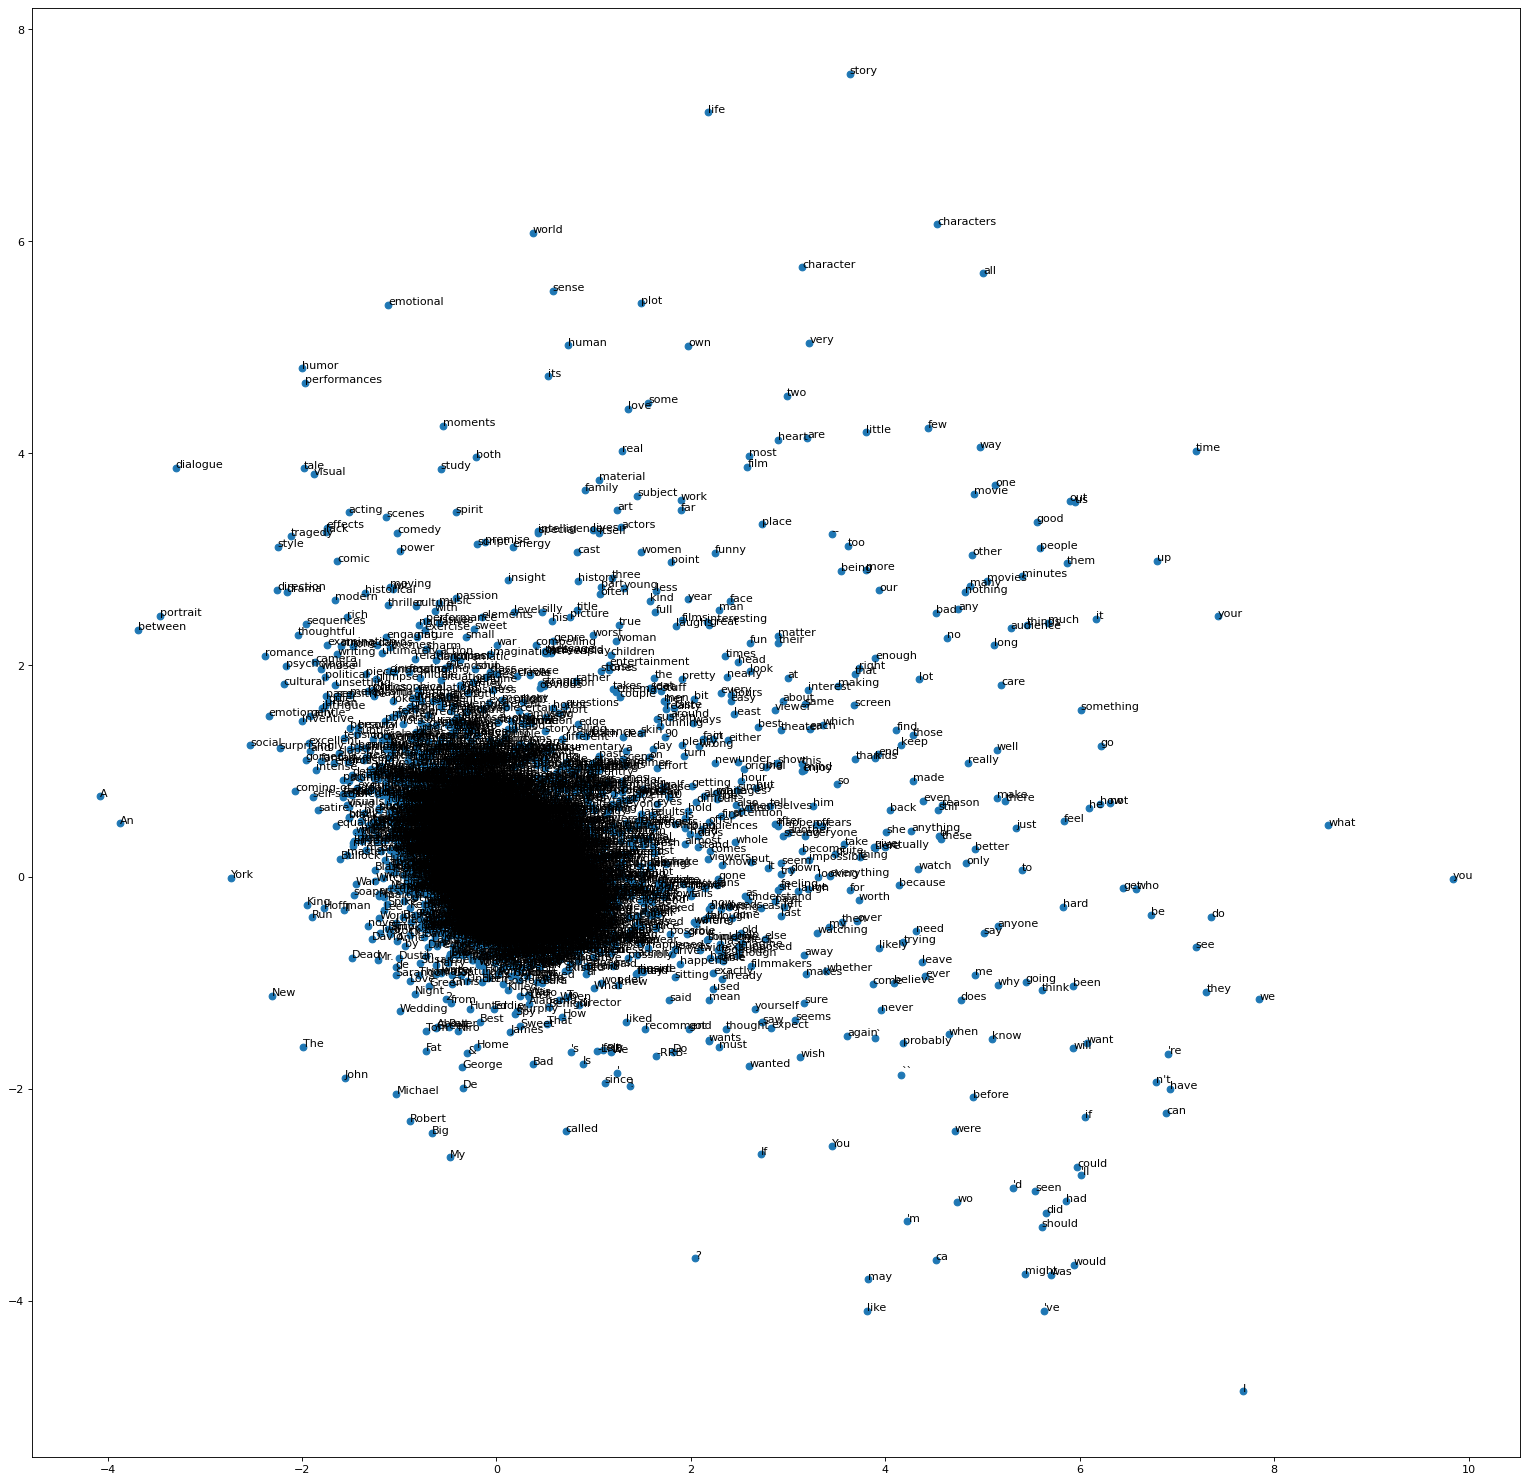

In [32]:
figure(figsize=(24, 24), dpi=80)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(new_model.wv.key_to_index)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.savefig('W2V.png')
pyplot.show()

**Use the Word2Vec Model to train a Sentiment Predictor**

In [34]:
#from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [35]:
#my_stop_words = ENGLISH_STOP_WORDS.union(['film', 'movie', 'cinema', 'theatre', 'hollywood'])

In [36]:
#predefinted list of stopwords has thing slite not and but which I fell take away functionality e.g. 'not funny'
#hence definiing my own
my_stop_words = ({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'cinema',
           'co',
           'con',
           'could',
           'couldnt',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'film',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'hollywood',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'movie',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nine',
           'nobody',
           'none',
           'noone',
           'nor',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           's',
           'same',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'theatre',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves'})

In [37]:
my_stop_words

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'cinema',
 'co',
 'con',
 'could',
 'couldnt',
 'de',
 'describe',
 'detail',
 'do',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'fill',
 'film',
 'find',
 'fire',
 'first',
 'five',
 'for',
 'fo

In [82]:
df2 = df1.head(2000)

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 5400
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    2000 non-null   int64 
 1   SentenceId  2000 non-null   int64 
 2   Phrase      2000 non-null   object
 3   Sentiment   2000 non-null   int64 
 4   wordcount   2000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 93.8+ KB


In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78290 entries, 0 to 156054
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    78290 non-null  int64 
 1   SentenceId  78290 non-null  int64 
 2   Phrase      78290 non-null  object
 3   Sentiment   78290 non-null  int64 
 4   wordcount   78290 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 6.1+ MB


In [97]:
#use the Word2Vec to vectorize the input dataframe
X_vectors = pd.DataFrame() #hold input vectors
y_sentiment = pd.DataFrame() #hold target Sentiments
#for text in df2['Phrase'].str.lower():
for ind in df1.index:
    text = df1['Phrase'][ind].lower()
    #print(df2['Phrase'][ind])
    #print(text)
    text = remove_punctuations(text)
    temp = pd.DataFrame()
    for word in text.split(' '):
        if word not in my_stop_words:
            try:
                word_vec = new_model.wv[word]
                temp = temp.append(pd.Series(word_vec), ignore_index = True)
            except:
                pass
    X_vector = temp.mean()
    X_vectors = X_vectors.append(X_vector, ignore_index = True)
    y_sentiment = y_sentiment.append(pd.Series(str(df1['Sentiment'][ind])), ignore_index = True)
    #print(df2['Sentiment'][ind])

In [98]:
y_sentiment.head()

,0
0,1
1,2
2,2
3,2
4,2


In [99]:
y_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78290 entries, 0 to 78289
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       78290 non-null  object
dtypes: object(1)
memory usage: 611.8+ KB


In [100]:
X_vectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78290 entries, 0 to 78289
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       77294 non-null  float32
 1   1       77294 non-null  float32
 2   2       77294 non-null  float32
 3   3       77294 non-null  float32
 4   4       77294 non-null  float32
 5   5       77294 non-null  float32
 6   6       77294 non-null  float32
 7   7       77294 non-null  float32
 8   8       77294 non-null  float32
 9   9       77294 non-null  float32
 10  10      77294 non-null  float32
 11  11      77294 non-null  float32
 12  12      77294 non-null  float32
 13  13      77294 non-null  float32
 14  14      77294 non-null  float32
 15  15      77294 non-null  float32
 16  16      77294 non-null  float32
 17  17      77294 non-null  float32
 18  18      77294 non-null  float32
 19  19      77294 non-null  float32
 20  20      77294 non-null  float32
 21  21      77294 non-null  float32
 2

In [103]:
X_vectors.isna()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
X_vectors_copy = X_vectors
y_sentiment_copy = y_sentiment

In [118]:
X_vectors_copy.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Sentiment
0,0.388231,-0.268691,-0.480879,-0.335295,0.133828,-0.160431,0.345364,0.402223,-0.781831,0.291245,...,0.134536,-0.120341,0.043262,0.445617,-0.128800,-0.345727,-0.319586,-0.104136,-0.914144,1
1,0.147475,-0.190524,-0.066088,-0.369387,0.166607,-0.374665,0.494729,0.375712,-0.616868,0.084714,...,0.220918,-0.196558,-0.062151,0.366492,-0.032187,-0.117697,-0.251658,0.064370,-0.811195,2
2,0.100725,-0.099839,-0.029626,-0.506220,0.078397,-0.224780,0.420417,0.280579,-0.660247,0.103054,...,0.241229,-0.317872,-0.226990,0.554565,-0.088271,-0.138342,-0.096318,0.199751,-0.832451,2
3,0.100725,-0.099839,-0.029626,-0.506220,0.078397,-0.224780,0.420417,0.280579,-0.660247,0.103054,...,0.241229,-0.317872,-0.226990,0.554565,-0.088271,-0.138342,-0.096318,0.199751,-0.832451,2
4,0.100725,-0.099839,-0.029626,-0.506220,0.078397,-0.224780,0.420417,0.280579,-0.660247,0.103054,...,0.241229,-0.317872,-0.226990,0.554565,-0.088271,-0.138342,-0.096318,0.199751,-0.832451,2


In [115]:
y_sentiment_copy.head()

,0
0,1
1,2
2,2
3,2
4,2


In [117]:
X_vectors_copy['Sentiment'] = y_sentiment_copy[0]

In [119]:
X_vectors_copy.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Sentiment
0,0.388231,-0.268691,-0.480879,-0.335295,0.133828,-0.160431,0.345364,0.402223,-0.781831,0.291245,...,0.134536,-0.120341,0.043262,0.445617,-0.128800,-0.345727,-0.319586,-0.104136,-0.914144,1
1,0.147475,-0.190524,-0.066088,-0.369387,0.166607,-0.374665,0.494729,0.375712,-0.616868,0.084714,...,0.220918,-0.196558,-0.062151,0.366492,-0.032187,-0.117697,-0.251658,0.064370,-0.811195,2
2,0.100725,-0.099839,-0.029626,-0.506220,0.078397,-0.224780,0.420417,0.280579,-0.660247,0.103054,...,0.241229,-0.317872,-0.226990,0.554565,-0.088271,-0.138342,-0.096318,0.199751,-0.832451,2
3,0.100725,-0.099839,-0.029626,-0.506220,0.078397,-0.224780,0.420417,0.280579,-0.660247,0.103054,...,0.241229,-0.317872,-0.226990,0.554565,-0.088271,-0.138342,-0.096318,0.199751,-0.832451,2
4,0.100725,-0.099839,-0.029626,-0.506220,0.078397,-0.224780,0.420417,0.280579,-0.660247,0.103054,...,0.241229,-0.317872,-0.226990,0.554565,-0.088271,-0.138342,-0.096318,0.199751,-0.832451,2


In [120]:
X_vectors_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78290 entries, 0 to 78289
Columns: 101 entries, 0 to Sentiment
dtypes: float32(100), object(1)
memory usage: 30.5+ MB


In [121]:
X_vectors_copy = X_vectors_copy.dropna()

In [122]:
X_vectors_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77294 entries, 0 to 78289
Columns: 101 entries, 0 to Sentiment
dtypes: float32(100), object(1)
memory usage: 30.7+ MB


**Train a Model**

In [123]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [124]:
train_x, test_x, train_y, test_y = train_test_split(X_vectors_copy.drop('Sentiment', axis = 1),
                                                   X_vectors_copy['Sentiment'],
                                                   test_size = 0.33,
                                                   random_state = 42)

In [125]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((51786, 100), (51786,), (25508, 100), (25508,))

In [130]:
clf = LinearSVC(max_iter=20000)

In [131]:
clf.fit(train_x, train_y)

LinearSVC(max_iter=20000)

In [132]:
predictions = clf.predict(test_x)

In [133]:
print(metrics.confusion_matrix(test_y, predictions))

[[  17  361 1299  213    0]
 [  15  760 4170  672    9]
 [  10  735 7342 1284   21]
 [   1  364 4015 2064   30]
 [   0   59 1029  985   53]]


In [134]:
print(metrics.classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       0.40      0.01      0.02      1890
           1       0.33      0.14      0.19      5626
           2       0.41      0.78      0.54      9392
           3       0.40      0.32      0.35      6474
           4       0.47      0.02      0.05      2126

    accuracy                           0.40     25508
   macro avg       0.40      0.25      0.23     25508
weighted avg       0.39      0.40      0.34     25508



In [135]:
print(metrics.accuracy_score(test_y,predictions))

0.401285871099263
